In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
%matplotlib inline

In [2]:
#  ajustes de gráficos.
rcParams['figure.figsize'] = 10, 8   #TamaNo
matplotlib.rc('font', family='serif')
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

In [15]:
#Funcion a tratar
def f(x):
    return 3*np.cos(0.8*x) + 0.5 * x**(3/2) - 2.

In [3]:
np.random.seed(123)
N = 200  #Numeo de puntos
f_true = 1.5 #factor para introducir dispersión intrínseca a los datos, 0 = sin dispersión.
f_true_err = 1.0 #factor de subestimación para las incertidumbres de errores individuales.
xdata = np.sort(np.random.rand(N) * 10) #Se generan las x.
yvals_err = 0.5*np.abs(np.random.normal(0.,1.,N))*f_true_err
ydata = f(xdata)  #En funcion de las x, se genera las y. 
ydata += yvals_err * np.random.randn(N) * f_true #Errores en y
x = np.arange(0,10,0.05) #Para la grafica.

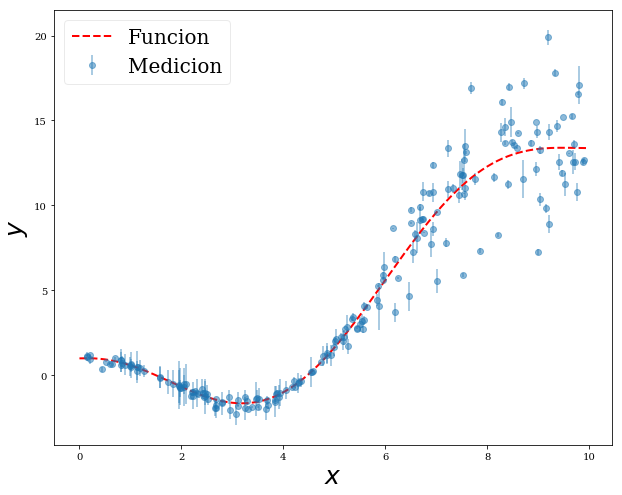

In [24]:
plt.figure()
ax = plt.gca()
#Generamos los datos, que seran los equivalentes a nuestras mediciones.
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25) #X generados
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25) #Y generados
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='Medicion')
ax.plot(x,f(x), 'r--', label='Funcion',lw=2)  #Funcion
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()

Se reagrupa la funcion, para poder cambiar los parametros si se desea.

In [25]:
def f_(x,a,b,c,d):
    return a * np.cos(b * x) + c * x**(3/2) + d

def ff(x, p):
    return f_(x, *p)

# Los parametros iniciales conocidos
a_ = 3.
b_ = 0.8
c_ = 0.5
d_ = -2.

# Se varian los parametros iniciales (a,b,c,d) en funcion de los conocidos
pstart = [a_ + np.random.random(),b_ + .1*np.random.random(),c_ + .1*np.random.random(),d_ + np.random.random()]


Se traza la nueva funcion con los parametros iniciales aleatorios

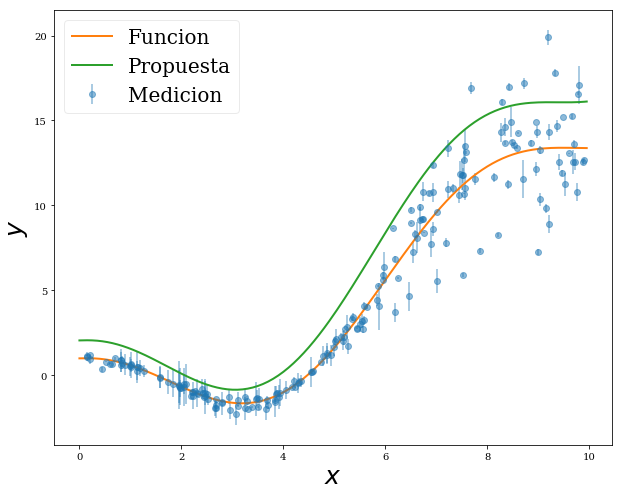

In [27]:
plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', y=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='Medicion')
ax.plot(x,f_(x,a_,b_,c_,d_),label='Funcion',lw=2)
ax.plot(x,ff(x,pstart),label='Propuesta',lw=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()

In [22]:
from scipy import optimize

Minimos cuadrados chi cuadrada

In [29]:
def fit_leastsq(p, datax, datay, function):  #Minimiza la suma de cuadrados de un conjunto de ecuaciones.

    errfunc = lambda p_, x, y: function(x,p_) - y

    pfit, pcov, infodict, errmsg, success = \
        optimize.leastsq(errfunc, p, args=(datax, datay), \
                          full_output=1, epsfcn=0.0001)

    if (len(datay) > len(p)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error) 
    return pfit_leastsq, perr_leastsq 

pfit, perr = fit_leastsq(pstart, xdata, ydata, ff)



Frafica con la aproximacion por minimos cuadrados

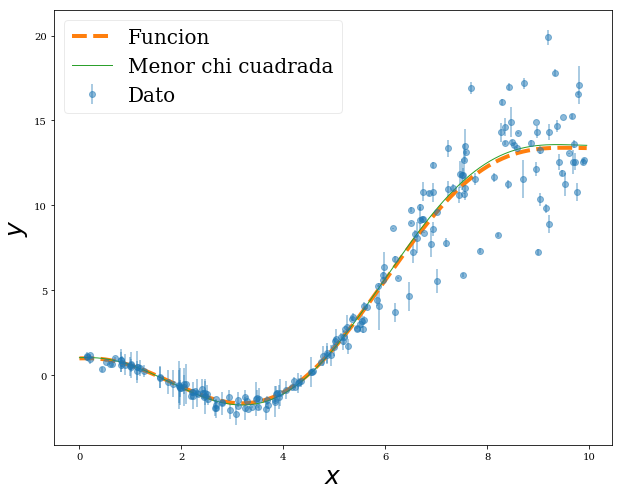

Ajuste  y errores de parámetros del metodo minimos cuadrados: 

Ajuste optimo [p0,p1,p2,p3] = 	 [ 3.10129121  0.80086227  0.50824654 -2.05960395]
Parametros de error +/- = 	 [0.17459574 0.00843177 0.01320031 0.19642952]
Parametros iniciales = 		 [3.0, 0.8, 0.5, -2.0]


In [39]:
plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='Dato')
ax.plot(x,f_(x,a_,b_,c_,d_),'--',label='Funcion',lw=4)
ax.plot(x,f_(x,pfit[0],pfit[1],pfit[2],pfit[3]),label='Menor chi cuadrada',lw=1)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()
print("Ajuste  y errores de parámetros del metodo minimos cuadrados: \n")
print("Ajuste optimo [p0,p1,p2,p3] = \t", pfit)
print("Parametros de error +/- = \t", perr)
print ("Parametros iniciales = \t\t",[a_,b_,c_,d_])

Minimos cuadrados por porbabilidades

In [40]:
#Redefinimos la funcion, para que sea mas facil operar con ella.
def f_(x,a,b,c,d):
    return a * np.cos(b * x) + c * x**(3/2) + d

def ff(x, p):
    return f_(x, *p)

# Parametros iniciales conocidos
a_ = 3.; b_ = 0.8; c_ = 0.5; d_ = -2.
p_ = [a_,b_,c_,d_]

# Nuevamente variamos los parametros:
pstart = [a_ + np.random.random(),b_ + .1*np.random.random(),c_ + .1*np.random.random(),d_ + np.random.random()]

#Elegimos nuevamente los aleatoriamente
N = 200
f_true = 0.2 
f_true_err = 1.0 
xdata = np.sort(np.random.rand(N) * 10)
yvals_err = 0.5*np.abs(np.random.normal(0.,1.,N))*f_true_err
ydata = ff(xdata,p_)
ydata += np.abs(f_true*ydata) * np.random.randn(N) 

In [41]:
#Definimos el likelihood en base a los parametros
def lnlike(theta, x, y, yerr):
    a, b, c, d, lnf = theta
    model = f_(x,a,b,c,d)
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

nll = lambda *args: -lnlike(*args)
result = optimize.minimize(nll, [a_, b_, c_, d_, np.log(f_true)], \
        args=(xdata, ydata, yvals_err))
a_ml, b_ml, c_ml, d_ml, lnf_ml = result["x"]

#Ya que ahora se quiere priorizar la mayor porbabilidad.

In [ ]:
Graficamos

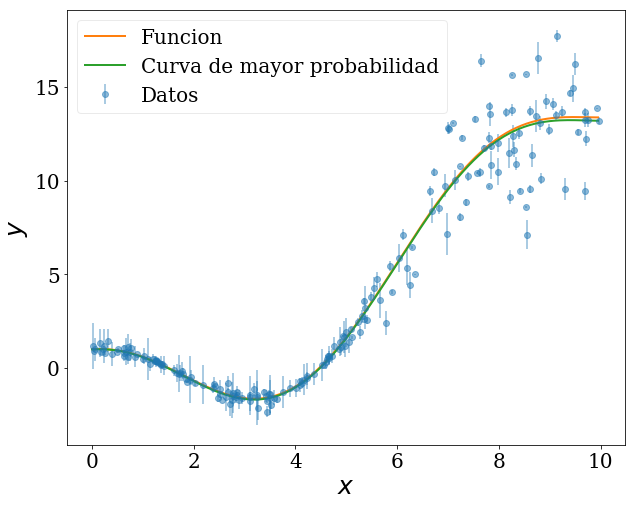

In [43]:
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata,ydata,yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='Datos')
ax.plot(x,ff(x,p_),label='Funcion',lw=2)
ax.plot(x,f_(x,a_ml,b_ml,c_ml,d_ml),label='Curva de mayor probabilidad',lw=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()

Cadenas de Markov

In [44]:
#Definimmos el prior
def lnprior(theta):
    a, b, c, d, lnf = theta
    if 0.0 < a < 5.0 and 0.0 < b < 1.0 and 0.4 < c < 0.6 and -3.0 < d < -1.0 and -15.0 < lnf < 1.0:
        return 0.0
    return -np.inf
#Probabilidad
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)



In [45]:
#Para las cadenas de markov

#parametros y numero de caminadores
ndim, nwalkers = 5, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

#Usamos emcee
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(xdata, ydata, yvals_err))

#Ejecutamos MCMC para 500 spasos
print ("corriendo MCMC...")
sampler.run_mcmc(pos, 500, rstate0=np.random.get_state())
print ("Ejecutado.")

corriendo MCMC...
Ejecutado.


0=a,1=b,2=c,3=d
parametros


<Figure size 720x576 with 0 Axes>

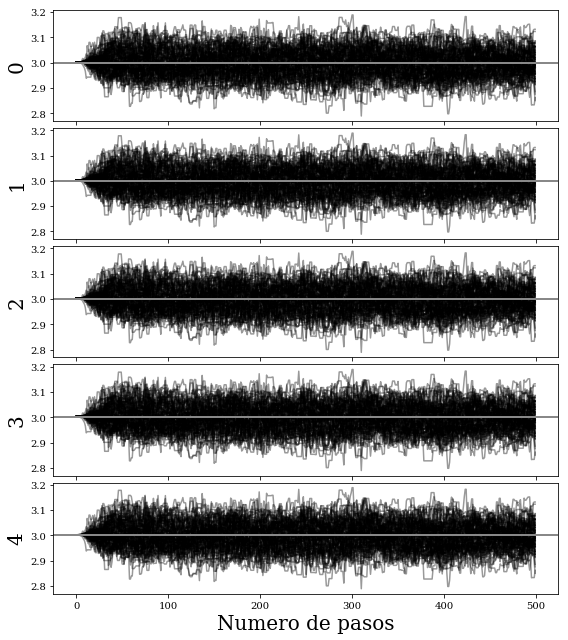

In [55]:
#Para la evolucion de la cadena.
from matplotlib.ticker import MaxNLocator
print('0=a,1=b,2=c,3=d')
print('parametros')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.clf()
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(8, 9))
for i in range(5):
    axes[i].yaxis.label.set_size(20)
    axes[i].plot(sampler.chain[:, :, 0].T, color="k", alpha=0.4)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].axhline(a_, color="#888888", lw=2)
    axes[i].set_ylabel(i)
    
axes[4].set_xlabel("Numero de pasos")
truths=[a_, b_, c_, d_, np.log(f_true)]
fig.tight_layout(h_pad=0.0)
show_titles=True
plt.show()

Generar graficas corner

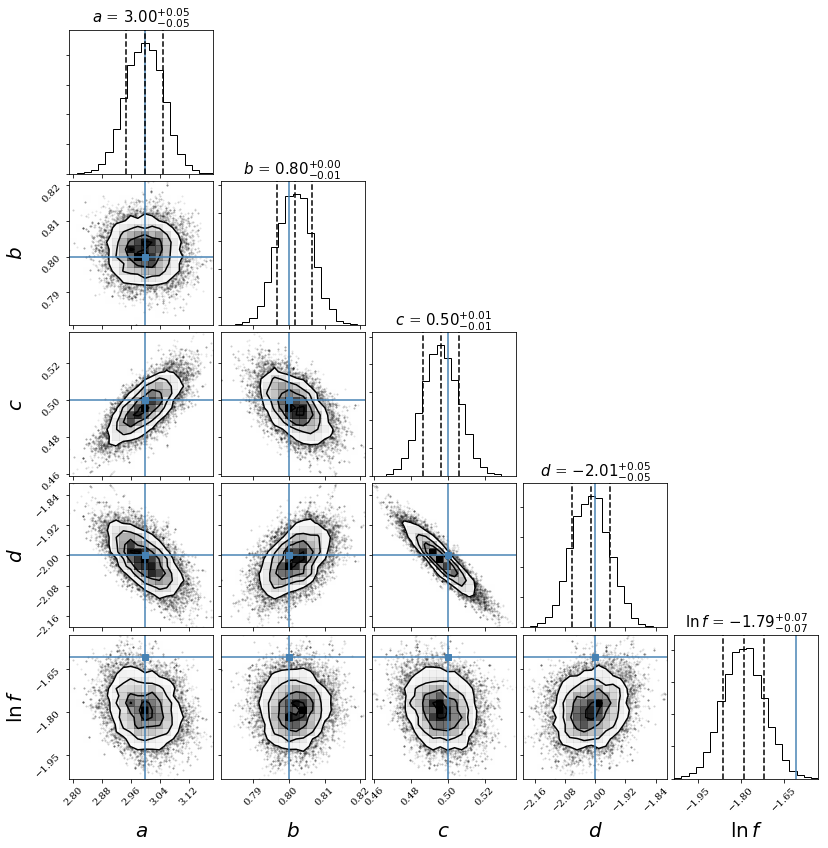

In [56]:
samples = sampler.chain[:, 200:, :].reshape((-1, ndim))

import corner
plt.rcParams['axes.labelsize'] = 20
fig = corner.corner(samples, labels=["$a$", "$b$", "$c$", "$d$", "$\ln\,f$"],
                    quantiles=[0.16, 0.5, 0.84],
                    truths=[a_, b_, c_, d_, np.log(f_true)],
                    show_titles=True, title_kwargs={"fontsize": 15})


Grafica de Conclusion

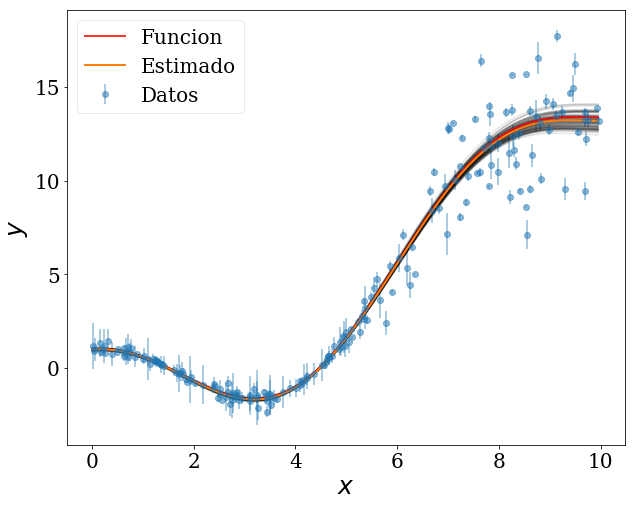

In [59]:
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.figure()
ax = plt.gca()
ax.set_xlabel(r'$x$', x=0.5, ha='center', fontsize=25)
ax.set_ylabel(r'$y$', x=0.5, ha='center', fontsize=25)
ax.errorbar(xdata, ydata, yerr=yvals_err,fmt='o',alpha=0.5,capthick=0,ls='none',label='Datos')
for a, b, c, d, lnf in samples[np.random.randint(len(samples), size=100)]:
    ax.plot(x, f_(x,a,b,c,d), color="k", alpha=0.1)
ax.plot(x, f_(x,a_,b_,c_,d_), color="r", lw=2, alpha=0.8, label='Funcion')
ax.plot(x,f_(x,a_ml,b_ml,c_ml,d_ml),label='Estimado',lw=2)
ax.legend(loc='best', prop={'size':20}, frameon=True, framealpha=0.4)
plt.show()
